In [39]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
%matplotlib inline
plt.rcParams["figure.figsize"] = [20, 7]

In [40]:
with open ('../data/highway_map.csv') as f:
    map_df = pd.read_table(f, sep=' ', header=0, names=['x','y','s','dx','dy'], lineterminator='\n')

In [87]:
maps_df=map_df.head(n=6).tail(n=3)

In [88]:
# initial car details
x0=909.48 
y0=1128.67 
vx0=0 
vy0=0 
v0=0 
yaw0=0 
s0=124.834
d0=6.16483
speed0=0 

nextx=[
    909.98,910.48,910.98,911.48,911.98,912.48,912.98,913.48,913.98,914.48,914.98,915.48,915.98,916.48,916.98,917.48,917.98,918.48,918.98,919.48,919.98,920.48,920.98,921.48,921.98,922.48,922.98,923.48,923.98,924.479,924.979,925.479,925.979,926.479,926.979,927.479,927.979,928.479,928.979,929.479,929.979,930.479,930.979,931.479,931.979,932.479,932.979,933.479,933.979,934.479
]
nexty=[
    1128.67,1128.68,1128.68,1128.69,1128.69,1128.7,1128.7,1128.7,1128.71,1128.71,1128.72,1128.72,1128.73,1128.73,1128.73,1128.74,1128.74,1128.75,1128.75,1128.76,1128.76,1128.76,1128.77,1128.77,1128.78,1128.78,1128.79,1128.79,1128.8,1128.8,1128.8,1128.81,1128.81,1128.82,1128.82,1128.83,1128.83,1128.83,1128.84,1128.84,1128.85,1128.85,1128.86,1128.86,1128.86,1128.87,1128.87,1128.88,1128.88,1128.89
]

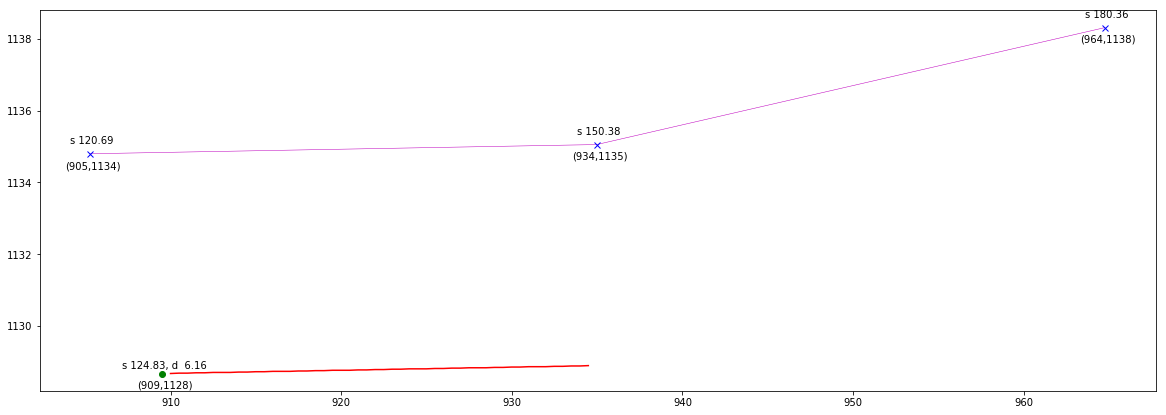

In [89]:
# plot waypoints and vehicle direction in map space
plt.figure()
plt.plot(maps_df.x,maps_df.y,linewidth=.5,color='m')
plt.plot(maps_df.x,maps_df.y,'bx')
plt.plot(nextx,nexty,'r-')

for s, x, y in zip( maps_df.s, maps_df.x, maps_df.y):
    plt.annotate('s %5.2f' % s, xy=(x, y), xytext=(-20, 10),textcoords='offset points')
    plt.annotate('(%d,%d)' % (x,y), xy=(x, y), xytext=(-25, -15),textcoords='offset points')

plt.plot()

plt.plot(x0,y0,'go')
plt.annotate('s %5.2f, d %5.2f' % (s0,d0), xy=(x0, y0), xytext=(-40, 5),textcoords='offset points')
plt.annotate('(%d,%d)' % (x0,y0), xy=(x0, y0), xytext=(-25, -15),textcoords='offset points')

In [36]:
labels

['text30.6744785308838',
 'text60.0463714599609',
 'text90.45041465759279',
 'text120.689735412598',
 'text150.375551223755',
 'text180.359313964844',
 'text211.649354934692',
 'text243.922914505005',
 'text275.754606246948',
 'text302.54886436462397']

In [105]:
x=2097.47
y=1395.35
vx=6.11902
vy=21.5972
v=22.4473
yaw=1.29471
s=1455.72
d=6.00028
speed=50.2131

nextx=[
    2100.74,2100.86,2100.97,2101.09,2101.21,2101.33,2101.45,2101.57,2101.69,2101.81,2101.93,2102.05,2102.17,2102.29,2102.41,2102.53,2102.65,2102.77,2102.89,2103.01,2103.13,2103.25,2103.37,2103.49,2103.61,2103.73,2103.85,2103.97,2104.09,2104.2,2104.32,2104.44,2104.56,2104.68,2104.8,2104.92,2105.04,2105.16,2105.28,2105.4,2105.52,2105.64,2105.76,2105.88,2106,2108.77,2108.83,2108.9,2108.97,2109.04
]
nexty=[
    1406.87,1407.3,1407.74,1408.17,1408.61,1409.04,1409.47,1409.91,1410.34,1410.77,1411.21,1411.64,1412.08,1412.51,1412.94,1413.38,1413.81,1414.25,1414.68,1415.11,1415.55,1415.98,1416.42,1416.85,1417.28,1417.72,1418.15,1418.59,1419.02,1419.45,1419.89,1420.32,1420.76,1421.19,1421.62,1422.06,1422.49,1422.92,1423.36,1423.79,1424.23,1424.66,1425.1,1425.53,1425.96,1439.21,1439.66,1440.1,1440.54,1440.99
]

In [106]:
maps_df=map_df.head(n=52).tail(n=3)

[]

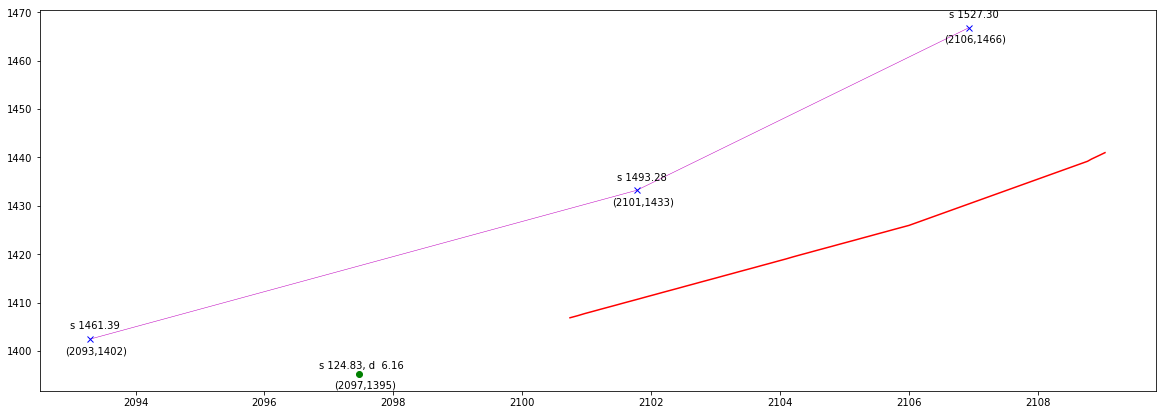

In [107]:
# plot waypoints and vehicle direction in map space
plt.figure()
plt.plot(maps_df.x,maps_df.y,linewidth=.5,color='m')
plt.plot(maps_df.x,maps_df.y,'bx')
plt.plot(nextx,nexty,'r-')
plt.plot(x,y,'go')

plt.annotate('s %5.2f, d %5.2f' % (s0,d0), xy=(x, y), xytext=(-40, 5),textcoords='offset points')
plt.annotate('(%d,%d)' % (x,y), xy=(x, y), xytext=(-25, -15),textcoords='offset points')

for s, x, y in zip( maps_df.s, maps_df.x, maps_df.y):
    plt.annotate('s %5.2f' % s, xy=(x, y), xytext=(-20, 10),textcoords='offset points')
    plt.annotate('(%d,%d)' % (x,y), xy=(x, y), xytext=(-25, -15),textcoords='offset points')

plt.plot()

